In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
def style_diag(data):
    '''author: CJR, https://stackoverflow.com/a/56916315'''
    diag_mask = pd.DataFrame("", index=data.index, columns=data.columns)
    min_axis = min(diag_mask.shape)
    diag_mask.iloc[range(min_axis), range(min_axis)] = 'background-color: yellow'
    return diag_mask

# Metric Analysis: Landcover Prediction

## Single-Year

### DataFrame (raw pixel count)

In [41]:
mimer = '/mimer/NOBACKUP/groups/globalpoverty1/albin_and_albin/'
file_singleyear = mimer + 'confusion_matrix_esri_urban_rural_34512_2018to2022.csv'

df_raw_count = pd.read_csv(file_singleyear, index_col=0)
df_raw_count.style.apply(style_diag, axis=None).format(precision=3)

,c1:Water,c2:Tree,c3:Flooded Vegetation,c4:Crops,c5:Bare Ground,c6:Rangeland,c7:Rural,c8:Urban
c1:Water,5065776515,10672474,170805886,3515149,23654129,12288370,4465311,2671241
c2:Tree,199659515,165946056799,1236321451,358235956,2610572,5555206990,275144978,24895229
c3:Flooded Vegetation,34232939,50056412,1399364058,17885025,420164,54425926,5753277,496519
c4:Crops,22740167,237708386,165032911,4496305334,39984527,1514347360,205110168,144493421
c5:Bare Ground,108780195,15919163,41022070,114695054,40393704941,1041453391,69275678,41721354
c6:Rangeland,215449475,22618886021,3601648984,4153490455,4926147877,75117546242,1285177820,78222008
c7:Rural,1629372,12431995,5563401,14596549,8771067,22631132,408418972,71245206
c8:Urban,3249570,8139947,4544763,22957832,1916050,9494325,276623821,968715658


In [42]:
df_raw_count.sum(axis=1)

c1:Water                   5293849075
c2:Tree                  173598131490
c3:Flooded Vegetation      1562634320
c4:Crops                   6825722274
c5:Bare Ground            41826571846
c6:Rangeland             111996568882
c7:Rural                    545287694
c8:Urban                   1295641966
dtype: int64

In [43]:
df_new = df_raw_count.sum(axis=1)
df_new = df_new.div(df_new.sum(axis=0), axis=0)
df_new

c1:Water                 0.015436
c2:Tree                  0.506199
c3:Flooded Vegetation    0.004557
c4:Crops                 0.019903
c5:Bare Ground           0.121963
c6:Rangeland             0.326574
c7:Rural                 0.001590
c8:Urban                 0.003778
dtype: float64

# Accuracy

In [44]:
tp = df_raw_count.to_numpy().diagonal().sum()
num_pixels = df_raw_count.to_numpy().sum()
print(f'accuracy: {tp / num_pixels}')

accuracy: 0.8566866292424836


# Recall

### DataFrame (recall)

In [45]:
df_recall = df_raw_count.div(df_raw_count.sum(axis=1), axis=0)
df_recall.style.apply(style_diag, axis=None).format(precision=3)

,c1:Water,c2:Tree,c3:Flooded Vegetation,c4:Crops,c5:Bare Ground,c6:Rangeland,c7:Rural,c8:Urban
c1:Water,0.957,0.002,0.032,0.001,0.004,0.002,0.001,0.001
c2:Tree,0.001,0.956,0.007,0.002,0.000,0.032,0.002,0.000
c3:Flooded Vegetation,0.022,0.032,0.896,0.011,0.000,0.035,0.004,0.000
c4:Crops,0.003,0.035,0.024,0.659,0.006,0.222,0.030,0.021
c5:Bare Ground,0.003,0.000,0.001,0.003,0.966,0.025,0.002,0.001
c6:Rangeland,0.002,0.202,0.032,0.037,0.044,0.671,0.011,0.001
c7:Rural,0.003,0.023,0.010,0.027,0.016,0.042,0.749,0.131
c8:Urban,0.003,0.006,0.004,0.018,0.001,0.007,0.214,0.748


### Seaborn Heatmap (Recall)

Text(0.5, 23.52222222222222, 'Predicted label')

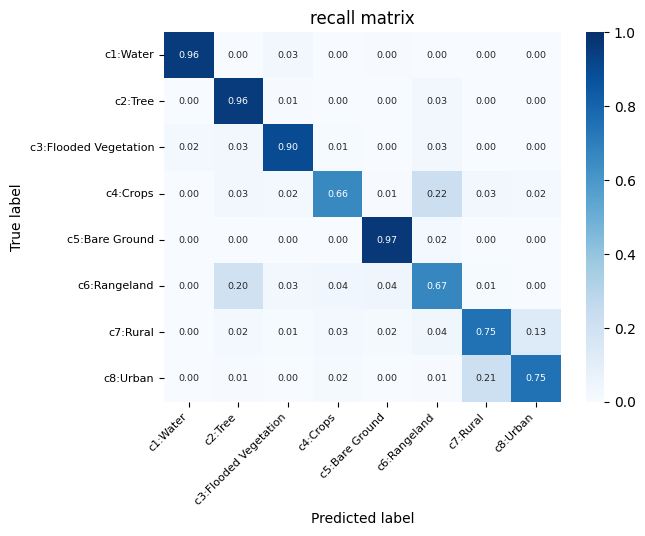

In [46]:
heatmap = sns.heatmap(data=df_recall, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":6.8}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('recall matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Recall score (per class accuracy)

In [47]:
class_names = df_recall.columns
confmat_diag = df_recall.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
recall_scores = pd.DataFrame(per_class_acc.items(), columns=['class', 'recall'])
recall_scores = recall_scores.round(3)
print(recall_scores.to_string(index=False))

                class  recall
             c1:Water   0.957
              c2:Tree   0.956
c3:Flooded Vegetation   0.896
             c4:Crops   0.659
       c5:Bare Ground   0.966
         c6:Rangeland   0.671
             c7:Rural   0.749
             c8:Urban   0.748


In [48]:
confmat_diag

array([0.95691744, 0.95592075, 0.89551601, 0.6587296 , 0.96574266,
       0.67071292, 0.74899723, 0.74767234])

# Precision

### DataFrame (precision)

In [49]:
df_precision = df_raw_count.div(df_raw_count.sum(axis=0), axis=1)
df_precision.style.apply(style_diag, axis=None).format(precision=3)

,c1:Water,c2:Tree,c3:Flooded Vegetation,c4:Crops,c5:Bare Ground,c6:Rangeland,c7:Rural,c8:Urban
c1:Water,0.896,0.000,0.026,0.000,0.001,0.000,0.002,0.002
c2:Tree,0.035,0.878,0.187,0.039,0.000,0.067,0.109,0.019
c3:Flooded Vegetation,0.006,0.000,0.211,0.002,0.000,0.001,0.002,0.000
c4:Crops,0.004,0.001,0.025,0.490,0.001,0.018,0.081,0.108
c5:Bare Ground,0.019,0.000,0.006,0.012,0.890,0.012,0.027,0.031
c6:Rangeland,0.038,0.120,0.544,0.452,0.109,0.901,0.508,0.059
c7:Rural,0.000,0.000,0.001,0.002,0.000,0.000,0.161,0.053
c8:Urban,0.001,0.000,0.001,0.003,0.000,0.000,0.109,0.727


### Seaborn Heatmap (Precision)

Text(0.5, 23.52222222222222, 'Predicted label')

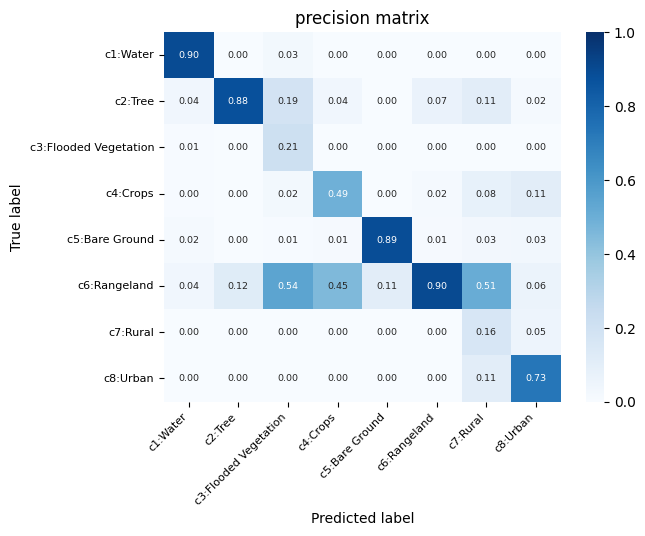

In [50]:
heatmap = sns.heatmap(data=df_precision, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":6.8}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('precision matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Precision score (prediction accuracy)

In [51]:
class_names = df_precision.columns
confmat_diag = df_precision.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
precision_scores = pd.DataFrame(per_class_acc.items(), columns=['class', 'precision'])
precision_scores = precision_scores.round(3)
print(precision_scores.to_string(index=False))

                class  precision
             c1:Water      0.896
              c2:Tree      0.878
c3:Flooded Vegetation      0.211
             c4:Crops      0.490
       c5:Bare Ground      0.890
         c6:Rangeland      0.901
             c7:Rural      0.161
             c8:Urban      0.727


In [52]:
confmat_diag

array([0.89635683, 0.87848687, 0.21124697, 0.48970392, 0.88978388,
       0.90147481, 0.16143234, 0.72701259])

# IoU

In [53]:
class_names = df_raw_count.columns
raw_counts = df_raw_count.to_numpy()
iou_class = {}

# calculate IoU for each class
for i in range(len(class_names)):
    tp = raw_counts[i, i]
    fp = raw_counts[:, i].sum() - tp
    fn = raw_counts[i, :].sum() - tp
    
    nom = tp
    denom = (tp + fp + fn)
    
    if denom != 0:
        iou = nom / denom
    else:
        iou = np.NaN
    iou_class[class_names[i]] = iou


# output IoU as dataframe
iou_scores = pd.DataFrame(iou_class.items(), columns=['class', 'IoU'])
iou_scores.round(3)

,class,IoU
0,c1:Water,0.862
1,c2:Tree,0.844
2,c3:Flooded Vegetation,0.206
3,c4:Crops,0.391
4,c5:Bare Ground,0.863
5,c6:Rangeland,0.625
6,c7:Rural,0.153
7,c8:Urban,0.584


In [54]:
# calculate mean IoU (not counting empty classes)
iou_mean = np.nanmean(iou_scores['IoU'])
iou_mean

0.5658793091651086

# F1 Score (Dice coefficient)

In [55]:
class_names = df_raw_count.columns
raw_counts = df_raw_count.to_numpy()
f1_class = {}

# calculate IoU for each class
for i in range(len(class_names)):
    tp = raw_counts[i, i]
    fp = raw_counts[:, i].sum() - tp
    fn = raw_counts[i, :].sum() - tp
    
    nom = tp
    denom = tp + 0.5*(fp + fn)
    
    if denom != 0:
        f1 = nom / denom
    else:
        f1 = np.NaN
    f1_class[class_names[i]] = f1

# output f1-score as dataframe
f1_scores = pd.DataFrame(f1_class.items(), columns=['class', 'f1-score'])
f1_scores.round(3)

,class,f1-score
0,c1:Water,0.926
1,c2:Tree,0.916
2,c3:Flooded Vegetation,0.342
3,c4:Crops,0.562
4,c5:Bare Ground,0.926
5,c6:Rangeland,0.769
6,c7:Rural,0.266
7,c8:Urban,0.737


In [56]:
# calculate mean f1-score (not counting empty classes)
f1_mean = np.nanmean(f1_scores['f1-score'])
f1_mean

0.6803786398636472

In [57]:
iou_f1 = iou_scores.set_index('class').join(f1_scores.set_index('class'))
iou_f1_mean = pd.DataFrame({'class': ['mean'], 'IoU': [iou_mean], 'f1-score': [f1_mean]}).set_index('class')
iou_f1 = pd.concat([iou_f1, iou_f1_mean])
iou_f1.round(3)

,IoU,f1-score
class,,
c1:Water,0.862,0.926
c2:Tree,0.844,0.916
c3:Flooded Vegetation,0.206,0.342
c4:Crops,0.391,0.562
c5:Bare Ground,0.863,0.926
c6:Rangeland,0.625,0.769
c7:Rural,0.153,0.266
c8:Urban,0.584,0.737
mean,0.566,0.680


# Metric Analysis: Landcover Prediction

## Multi-Year

### DataFrame (raw pixel count)

In [58]:
mimer = '/mimer/NOBACKUP/groups/globalpoverty1/albin_and_albin/'
file_multiyear = mimer + 'confusion_matrix_LSTM_esri_urban_rural_34512_2018to2022.csv'

df_raw_count2 = pd.read_csv(file_multiyear, index_col=0)
df_raw_count2.style.apply(style_diag, axis=None).format(precision=3)

,c1:Water,c2:Tree,c3:Flooded Vegetation,c4:Crops,c5:Bare Ground,c6:Rangeland,c7:Rural,c8:Urban
c1:Water,5041282122,8026897,197662197,2682329,24764169,12247475,4554070,2629816
c2:Tree,584393602,166381205216,2373149785,725733209,6404289,3226042202,248705058,52498129
c3:Flooded Vegetation,32908328,37719228,1435044980,20237856,390475,30281094,4990154,1062205
c4:Crops,24581585,274878263,175706781,4616625083,41470375,1352053143,191522840,148884204
c5:Bare Ground,122144488,16376514,57677094,105841674,40231018829,1133099503,111155514,49258230
c6:Rangeland,216013191,30111732092,5572224505,5127756060,4846309614,64732435266,1270876097,119222057
c7:Rural,1257429,15506072,5831866,13581136,6683796,17844191,396988702,87594502
c8:Urban,3329624,9078764,3889341,28782109,1168451,4548464,243311826,1001533387


In [59]:
df_raw_count2.sum(axis=1)

c1:Water                   5293849075
c2:Tree                  173598131490
c3:Flooded Vegetation      1562634320
c4:Crops                   6825722274
c5:Bare Ground            41826571846
c6:Rangeland             111996568882
c7:Rural                    545287694
c8:Urban                   1295641966
dtype: int64

In [60]:
df_new2 = df_raw_count2.sum(axis=1)
df_new2 = df_new2.div(df_new2.sum(axis=0), axis=0)
df_new2

c1:Water                 0.015436
c2:Tree                  0.506199
c3:Flooded Vegetation    0.004557
c4:Crops                 0.019903
c5:Bare Ground           0.121963
c6:Rangeland             0.326574
c7:Rural                 0.001590
c8:Urban                 0.003778
dtype: float64

# Accuracy

In [61]:
tp = df_raw_count2.to_numpy().diagonal().sum()
num_pixels = df_raw_count2.to_numpy().sum()
print(f'accuracy: {tp / num_pixels}')

accuracy: 0.8276447358194657


# Recall

### DataFrame (recall)

In [62]:
df_recall2 = df_raw_count2.div(df_raw_count2.sum(axis=1), axis=0)
df_recall2.style.apply(style_diag, axis=None).format(precision=3)

,c1:Water,c2:Tree,c3:Flooded Vegetation,c4:Crops,c5:Bare Ground,c6:Rangeland,c7:Rural,c8:Urban
c1:Water,0.952,0.002,0.037,0.001,0.005,0.002,0.001,0.000
c2:Tree,0.003,0.958,0.014,0.004,0.000,0.019,0.001,0.000
c3:Flooded Vegetation,0.021,0.024,0.918,0.013,0.000,0.019,0.003,0.001
c4:Crops,0.004,0.040,0.026,0.676,0.006,0.198,0.028,0.022
c5:Bare Ground,0.003,0.000,0.001,0.003,0.962,0.027,0.003,0.001
c6:Rangeland,0.002,0.269,0.050,0.046,0.043,0.578,0.011,0.001
c7:Rural,0.002,0.028,0.011,0.025,0.012,0.033,0.728,0.161
c8:Urban,0.003,0.007,0.003,0.022,0.001,0.004,0.188,0.773


### Recall score (per class accuracy)

In [63]:
class_names = df_recall2.columns
confmat_diag = df_recall2.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
recall_scores2 = pd.DataFrame(per_class_acc.items(), columns=['class', 'recall'])
recall_scores2 = recall_scores2.round(3)
print(recall_scores2.to_string(index=False))

                class  recall
             c1:Water   0.952
              c2:Tree   0.958
c3:Flooded Vegetation   0.918
             c4:Crops   0.676
       c5:Bare Ground   0.962
         c6:Rangeland   0.578
             c7:Rural   0.728
             c8:Urban   0.773


# Precision

### DataFrame (precision)

In [64]:
df_precision2 = df_raw_count2.div(df_raw_count2.sum(axis=0), axis=1)
df_precision2.style.apply(style_diag, axis=None).format(precision=3)

,c1:Water,c2:Tree,c3:Flooded Vegetation,c4:Crops,c5:Bare Ground,c6:Rangeland,c7:Rural,c8:Urban
c1:Water,0.837,0.000,0.020,0.000,0.001,0.000,0.002,0.002
c2:Tree,0.097,0.845,0.242,0.068,0.000,0.046,0.101,0.036
c3:Flooded Vegetation,0.005,0.000,0.146,0.002,0.000,0.000,0.002,0.001
c4:Crops,0.004,0.001,0.018,0.434,0.001,0.019,0.077,0.102
c5:Bare Ground,0.020,0.000,0.006,0.010,0.891,0.016,0.045,0.034
c6:Rangeland,0.036,0.153,0.567,0.482,0.107,0.918,0.514,0.082
c7:Rural,0.000,0.000,0.001,0.001,0.000,0.000,0.161,0.060
c8:Urban,0.001,0.000,0.000,0.003,0.000,0.000,0.098,0.685


### Precision score (prediction accuracy)

In [65]:
class_names = df_precision2.columns
confmat_diag = df_precision2.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
precision_scores2 = pd.DataFrame(per_class_acc.items(), columns=['class', 'precision'])
precision_scores2 = precision_scores2.round(3)
print(precision_scores2.to_string(index=False))

                class  precision
             c1:Water      0.837
              c2:Tree      0.845
c3:Flooded Vegetation      0.146
             c4:Crops      0.434
       c5:Bare Ground      0.891
         c6:Rangeland      0.918
             c7:Rural      0.161
             c8:Urban      0.685


# IoU

In [66]:
class_names = df_raw_count2.columns
raw_counts = df_raw_count2.to_numpy()
iou_class = {}

# calculate IoU for each class
for i in range(len(class_names)):
    tp = raw_counts[i, i]
    fp = raw_counts[:, i].sum() - tp
    fn = raw_counts[i, :].sum() - tp
    
    nom = tp
    denom = (tp + fp + fn)
    
    if denom != 0:
        iou = nom / denom
    else:
        iou = np.NaN
    iou_class[class_names[i]] = iou


# output IoU as dataframe
iou_scores2 = pd.DataFrame(iou_class.items(), columns=['class', 'IoU'])
iou_scores2.round(3)

,class,IoU
0,c1:Water,0.803
1,c2:Tree,0.815
2,c3:Flooded Vegetation,0.144
3,c4:Crops,0.359
4,c5:Bare Ground,0.860
5,c6:Rangeland,0.550
6,c7:Rural,0.151
7,c8:Urban,0.570


In [67]:
# calculate mean IoU (not counting empty classes)
iou_mean2 = np.nanmean(iou_scores2['IoU'])
iou_mean2

0.5316846540212369

# F1 Score (Dice coefficient)

In [68]:
class_names = df_raw_count2.columns
raw_counts = df_raw_count2.to_numpy()
f1_class = {}

# calculate IoU for each class
for i in range(len(class_names)):
    tp = raw_counts[i, i]
    fp = raw_counts[:, i].sum() - tp
    fn = raw_counts[i, :].sum() - tp
    
    nom = tp
    denom = tp + 0.5*(fp + fn)
    
    if denom != 0:
        f1 = nom / denom
    else:
        f1 = np.NaN
    f1_class[class_names[i]] = f1

# output f1-score as dataframe
f1_scores2 = pd.DataFrame(f1_class.items(), columns=['class', 'f1-score'])
f1_scores2.round(3)

,class,f1-score
0,c1:Water,0.891
1,c2:Tree,0.898
2,c3:Flooded Vegetation,0.252
3,c4:Crops,0.529
4,c5:Bare Ground,0.925
5,c6:Rangeland,0.709
6,c7:Rural,0.263
7,c8:Urban,0.726


In [69]:
# calculate mean f1-score (not counting empty classes)
f1_mean2 = np.nanmean(f1_scores2['f1-score'])
f1_mean2

0.6491761145662447

In [70]:
iou_f1_2 = iou_scores2.set_index('class').join(f1_scores2.set_index('class'))
iou_f1_mean_2 = pd.DataFrame({'class': ['mean'], 'IoU': [iou_mean2], 'f1-score': [f1_mean2]}).set_index('class')
iou_f1_2 = pd.concat([iou_f1_2, iou_f1_mean_2])
iou_f1_2.round(3)

,IoU,f1-score
class,,
c1:Water,0.803,0.891
c2:Tree,0.815,0.898
c3:Flooded Vegetation,0.144,0.252
c4:Crops,0.359,0.529
c5:Bare Ground,0.860,0.925
c6:Rangeland,0.550,0.709
c7:Rural,0.151,0.263
c8:Urban,0.570,0.726
mean,0.532,0.649


### Difference

In [71]:
# https://www.geeksforgeeks.org/highlight-the-negative-values-red-and-positive-values-black-in-pandas-dataframe/
# Define a function for colouring 
# negative values red and 
# positive values black
def highlight_max(s):
    if s.dtype == np.object:
        is_neg = [False for _ in range(s.shape[0])]
    else:
        is_neg = s < 0
    return ['color: red;' if cell else 'color:blue' 
            for cell in is_neg]



In [72]:
df_recall_Score_diff = recall_scores2.set_index('class') - recall_scores.set_index('class')
df_recall_Score_diff.style.apply(highlight_max).format(precision=3)

/tmp/ipykernel_2728299/1906642432.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if s.dtype == np.object:


,recall
class,
c1:Water,-0.005
c2:Tree,0.002
c3:Flooded Vegetation,0.022
c4:Crops,0.017
c5:Bare Ground,-0.004
c6:Rangeland,-0.093
c7:Rural,-0.021
c8:Urban,0.025


In [73]:
df_precision_Score_diff = precision_scores2.set_index('class') - precision_scores.set_index('class')
df_precision_Score_diff.style.apply(highlight_max).format(precision=3)

/tmp/ipykernel_2728299/1906642432.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if s.dtype == np.object:


,precision
class,
c1:Water,-0.059
c2:Tree,-0.033
c3:Flooded Vegetation,-0.065
c4:Crops,-0.056
c5:Bare Ground,0.001
c6:Rangeland,0.017
c7:Rural,0.000
c8:Urban,-0.042


In [74]:
df_iou_f1 = iou_f1_2 - iou_f1
df_iou_f1.style.apply(highlight_max).format(precision=3)

/tmp/ipykernel_2728299/1906642432.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if s.dtype == np.object:


,IoU,f1-score
class,,
c1:Water,-0.059,-0.035
c2:Tree,-0.029,-0.017
c3:Flooded Vegetation,-0.062,-0.090
c4:Crops,-0.031,-0.033
c5:Bare Ground,-0.002,-0.001
c6:Rangeland,-0.075,-0.060
c7:Rural,-0.002,-0.002
c8:Urban,-0.014,-0.011
mean,-0.034,-0.031


### Seaborn Heatmap (Recall)

Text(0.5, 23.52222222222222, 'Predicted label')

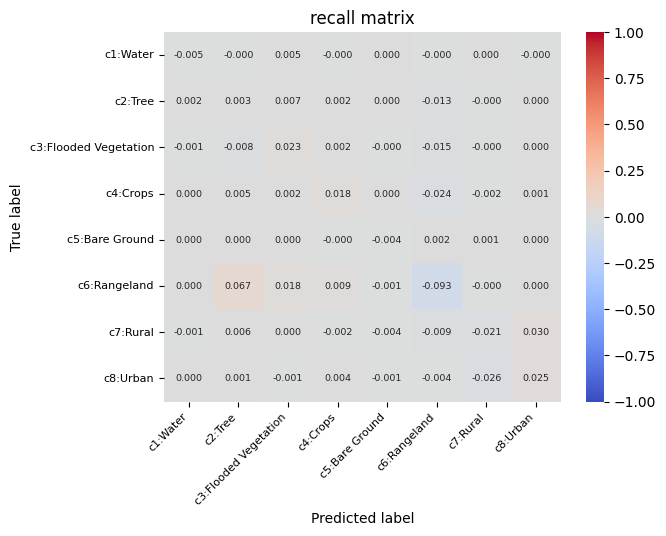

In [75]:
df_recall_diff = df_recall2 - df_recall
c = sns.color_palette("coolwarm", as_cmap=True)

heatmap = sns.heatmap(data=df_recall_diff, vmin=-1.0, vmax=1.0, cmap=c, annot=True, annot_kws={"fontsize":6.8}, fmt='.3f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('recall matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Seaborn Heatmap (Precision)

Text(0.5, 23.52222222222222, 'Predicted label')

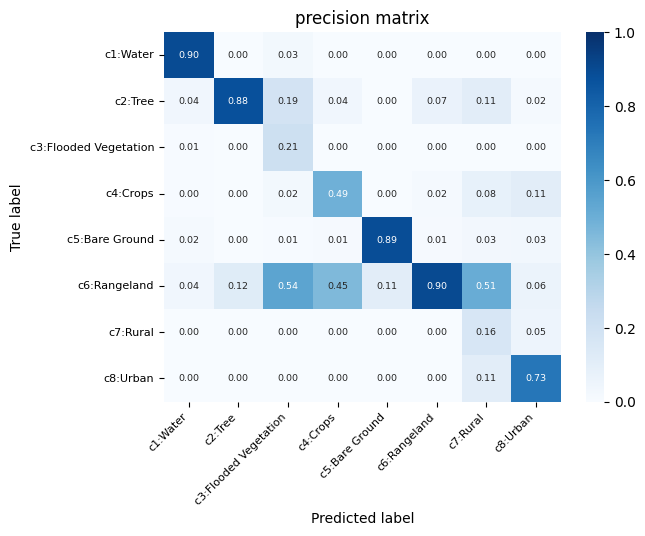

In [76]:
heatmap = sns.heatmap(data=df_precision, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":6.8}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('precision matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')